In [11]:
import pandas as pd;import numpy as np

vinos=pd.read_csv(r'C:\Users\SONY\Desktop\NumPy\wine.data',header=None)
vinos.columns=['Class label', 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash','Magnesium', 'Total phenols',
 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines',
 'Proline']
vinos=vinos[vinos['Class label']!=1]
y=vinos['Class label'].values
X=vinos[['Alcohol','OD280/OD315 of diluted wines']].values


In [12]:
from sklearn. model_selection import train_test_split;from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,stratify=y,test_size=0.2)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Text(0, 0.5, 'OD280/OD315 of diluted wines')

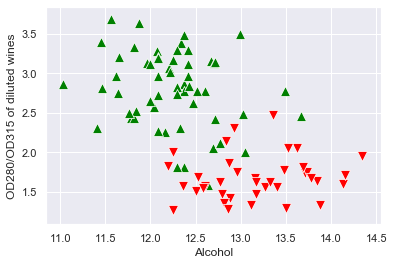

In [22]:
import matplotlib.pyplot as plt;import seaborn as sns;sns.set()
plt.style.use('seaborn-pastel')
sns.scatterplot(X_train[y_train==0,0],X_train[y_train==0,1],marker='^',color='green',s=100)
sns.scatterplot(X_train[y_train==1,0],X_train[y_train==1,1],marker='v',color='red',s=100)
plt.xlabel('Alcohol')
plt.ylabel('OD280/OD315 of diluted wines')


In [25]:
from sklearn.tree import DecisionTreeClassifier;from sklearn.metrics import accuracy_score
        
tree=DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=1)
tree.fit(X_train,y_train)
y_predict=tree.predict(X_test)
y_train_predict=tree.predict(X_train)
print(f'Validación: {accuracy_score(y_test,y_predict):.2f}\nEntrenamiento: {accuracy_score(y_train,y_train_predict):.2f}')


Validación: 0.88
Entrenamiento: 0.92


In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(base_estimator=tree,n_estimators=500,learning_rate=0.1,random_state=1)
ada.fit(X_train,y_train)
y_ada_predict=ada.predict(X_test)
y_ada_train=ada.predict(X_train)
print(f'Validación: {accuracy_score(y_test,y_ada_predict):.2f}\nEntrenamiento: {accuracy_score(y_train,y_ada_train):.2f}')



Validación: 0.92
Entrenamiento: 1.00


#### En la anterior celda el uso del AdaBoost mejora notablemente la clasificación en el conjunto de entrenamiento como en el conjunto de validación 

Text(0, 0.5, 'OD280/OD315 of diluted wines')

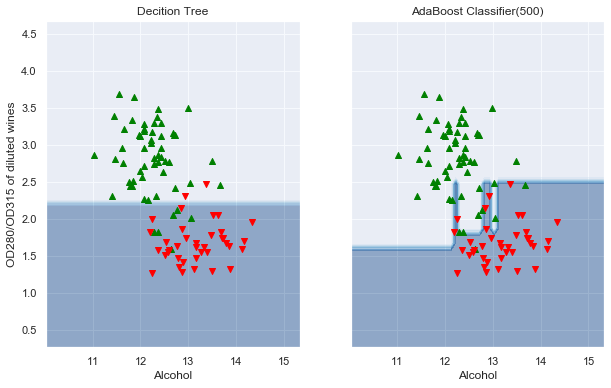

In [41]:
import numpy as np
x_min=X_train[:,0].min()-1;x_max=X_train[:,0].max()+1
y_min=X_train[:,1].min()-1;y_max=X_train[:,1].max()+1
vector1=np.arange(x_min,x_max,0.1)
vector2=np.arange(y_min,y_max,0.1)
x_mesh,y_mesh=np.meshgrid(vector1,vector2)
nombres=['Decition Tree','AdaBoost Classifier(500)']
estimadores=[tree,ada]
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(10,6),sharex='col',sharey='row')

for index,estimador,nombre in zip([0,1],estimadores,nombres):
    Z=estimador.predict(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)
    Z=Z.reshape(x_mesh.shape)
    ax[index].contourf(x_mesh,y_mesh,Z,cmap='Blues',alpha=0.4)
    ax[index].scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='green',marker='^')
    ax[index].scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='red',marker='v')
    ax[index].set_title(nombre)
    ax[index].set_xlabel('Alcohol')
    
ax[0].set_ylabel('OD280/OD315 of diluted wines')
